In [1]:
from nuscenes.prediction import PredictHelper
from nuscenes import NuScenes
DATAROOT = "data/nuscenes"
nusc = NuScenes("v1.0-trainval", dataroot=DATAROOT)

Loading NuScenes tables for version v1.0-trainval...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
34149 lidarseg,
Done loading in 29.314 seconds.
Reverse indexing ...
Done reverse indexing in 5.3 seconds.


In [2]:
from nuscenes.eval.prediction.splits import get_prediction_challenge_split
mini_train = get_prediction_challenge_split("mini_train", dataroot=DATAROOT)
mini_train[:5]

['bc38961ca0ac4b14ab90e547ba79fbb6_39586f9d59004284a7114a68825e8eec',
 'bc38961ca0ac4b14ab90e547ba79fbb6_356d81f38dd9473ba590f39e266f54e5',
 'bc38961ca0ac4b14ab90e547ba79fbb6_e0845f5322254dafadbbed75aaa07969',
 'bc38961ca0ac4b14ab90e547ba79fbb6_c923fe08b2ff4e27975d2bf30934383b',
 'bc38961ca0ac4b14ab90e547ba79fbb6_f1e3d9d08f044c439ce86a2d6fcca57b']

In [3]:
from nuscenes.prediction import PredictHelper
helper = PredictHelper(nusc)
# a class that provides methods for querying past and future data for an agent. 

to get the data for an agent at a particular time point:

In [4]:
instance_token, sample_token = mini_train[0].split("_")
annotation = helper.get_sample_annotation(instance_token, sample_token)
annotation

{'token': 'a286c9633fa34da5b978758f348996b0',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
 'visibility_token': '4',
 'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
 'translation': [392.945, 1148.426, 0.766],
 'size': [1.708, 4.01, 1.631],
 'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
 'prev': '16140fbf143d4e26a4a7613cbd3aa0e8',
 'next': 'b41e15b89fd44709b439de95dd723617',
 'num_lidar_pts': 0,
 'num_radar_pts': 0,
 'category_name': 'vehicle.car'}

to get the future/past of an agent, use `helper.get_future_for_agent/helper.get_past_for_agent` methods. the param `in_agent_frame` converts coords from global frame to agent's local frame if set to true.

In [8]:
future_xy_local = helper.get_future_for_agent(instance_token, sample_token, seconds=3, in_agent_frame=True)
future_xy_local

array([[ 0.01075063,  0.2434942 ],
       [-0.20463666,  1.20515386],
       [-0.20398583,  2.57851309],
       [-0.25867757,  4.50313379],
       [-0.31359088,  6.67620961],
       [-0.31404147,  9.67727022]])

In [10]:
future_xy_global = helper.get_future_for_agent(instance_token, sample_token, seconds=11, in_agent_frame=False)
future_xy_global

array([[ 392.836, 1148.208],
       [ 392.641, 1147.242],
       [ 392.081, 1145.988],
       [ 391.347, 1144.208],
       [ 390.512, 1142.201],
       [ 389.29 , 1139.46 ],
       [ 388.168, 1136.675],
       [ 386.878, 1133.783],
       [ 385.638, 1131.14 ],
       [ 384.005, 1128.317],
       [ 382.188, 1125.617],
       [ 380.066, 1123.072],
       [ 377.248, 1120.613],
       [ 374.393, 1118.767],
       [ 371.364, 1117.297],
       [ 368.254, 1116.32 ],
       [ 365.092, 1116.247],
       [ 361.627, 1116.685],
       [ 358.196, 1117.398],
       [ 354.824, 1118.349],
       [ 350.381, 1119.451],
       [ 346.001, 1120.849]])

to get the original entire annotation, pass `just_xy=False`. Note that in this case, coords are in global frame.

In [11]:
helper.get_future_for_agent(instance_token, sample_token, seconds=3, in_agent_frame=True, just_xy=False)

[{'token': 'b41e15b89fd44709b439de95dd723617',
  'sample_token': '356d81f38dd9473ba590f39e266f54e5',
  'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
  'visibility_token': '4',
  'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
  'translation': [392.836, 1148.208, 0.791],
  'size': [1.708, 4.01, 1.631],
  'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
  'prev': 'a286c9633fa34da5b978758f348996b0',
  'next': 'b2b43ef63f5242b2a4c0b794e673782d',
  'num_lidar_pts': 10,
  'num_radar_pts': 2,
  'category_name': 'vehicle.car'},
 {'token': 'b2b43ef63f5242b2a4c0b794e673782d',
  'sample_token': 'e0845f5322254dafadbbed75aaa07969',
  'instance_token': 'bc38961ca0ac4b14ab90e547ba79fbb6',
  'visibility_token': '4',
  'attribute_tokens': ['cb5118da1ab342aa947717dc53544259'],
  'translation': [392.641, 1147.242, 0.816],
  'size': [1.708, 4.01, 1.631],
  'rotation': [-0.5443682117180475, 0.0, 0.0, 0.8388463804957943],
  'prev': 'b41e15b89fd44709b439de95dd723617',
  'nex

to get the entire sample annots

In [12]:
sample = helper.get_annotations_for_sample(sample_token)
len(sample) # single time stamp

78

In [15]:
sample[0]

{'token': '7987617983634b119e383d8a29607fd7',
 'sample_token': '39586f9d59004284a7114a68825e8eec',
 'instance_token': '6dd2cbf4c24b4caeb625035869bca7b5',
 'visibility_token': '1',
 'attribute_tokens': ['4d8821270b4a47e3a8a300cbec48188e'],
 'translation': [373.256, 1130.419, 0.81],
 'size': [0.621, 0.669, 1.642],
 'rotation': [0.9831098797903927, 0.0, 0.0, -0.18301629506281616],
 'prev': 'ef63a697930c4b20a6b9791f423351da',
 'next': '9acb7dfed3454f72b2874dda3bdacc48',
 'num_lidar_pts': 1,
 'num_radar_pts': 0,
 'category_name': 'human.pedestrian.adult'}

to get trajectories for each agent in the sample

In [22]:
future_samples = helper.get_future_for_sample(sample_token, seconds=2, in_agent_frame=False)
len(future_samples)

78

In [21]:
future_samples[instance_token]

array([[ 392.836, 1148.208],
       [ 392.641, 1147.242],
       [ 392.081, 1145.988],
       [ 391.347, 1144.208]])

to get linear and angular velocities :

In [24]:
print(helper.get_heading_change_rate_for_agent(instance_token, sample_token))
print(helper.get_velocity_for_agent(instance_token, sample_token))

0.0
1.7065235955558908


## Map API

In [25]:
from nuscenes.map_expansion.map_api import NuScenesMap
nusc_map = NuScenesMap(map_name="singapore-onenorth", dataroot=DATAROOT)

to get the closest lane to a location, use the `get_closest_lane` method. use `get_arcline_path` to see the internal data of the lane, for connectivities, use `get_outgoing/ingoing_lane` method 

In [27]:
x, y, yaw = 395, 1095, 0
closest_lane = nusc_map.get_closest_lane(x, y, radius=2)
closest_lane

'5933500a-f0f2-4d69-9bbc-83b875e4a73e'

In [34]:
arcline_path = nusc_map.get_arcline_path(closest_lane)
print(arcline_path)

[{'start_pose': [421.2419602954602, 1087.9127960414617, 2.739593514975998], 'end_pose': [391.7142849867393, 1100.464077182952, 2.7365754617298705], 'shape': 'LSR', 'radius': 999.999, 'segment_length': [0.23651121617864976, 28.593481378991886, 3.254561444252876]}]


In [36]:
from nuscenes.map_expansion import arcline_path_utils
poses = arcline_path_utils.discretize_lane(arcline_path, resolution_meters=1)
len(poses)

34

to get the closest point of a lane to a given point, as well as the longitudinal distance of the queried point:

In [40]:
closest_point_on_lane, distance_along_lane1 = arcline_path_utils.project_pose_to_lane((x,y,yaw), arcline_path)
print(x,y,yaw, closest_point_on_lane)

395 1095 0 (396.25524909914367, 1098.5289922434013, 2.739830026428688)


In [39]:
closest_point_on_lane, distance_along_lane2 = arcline_path_utils.project_pose_to_lane((x+200,y,yaw), arcline_path)
print(closest_point_on_lane)

(421.2419602954602, 1087.9127960414617, 2.739593514975998)


In [41]:
distance_along_lane1, distance_along_lane2

(27.5, 0.0)

In [42]:
arcline_path_utils.length_of_lane(arcline_path)

32.08455403942341

In [44]:
arcline_path_utils.get_curvature_at_distance_along_lane(distance_along_lane1, arcline_path)

0

## Input Repr

We provide a module called input_representation that is meant to make it easy for you to define your own input representation. In short, you need to define your own StaticLayerRepresentation, AgentRepresentation, and Combinator.

The StaticLayerRepresentation controls how the static map information is represented. The AgentRepresentation controls how the locations of the agents in the scene are represented. The Combinator controls how these two sources of information are combined into a single tensor.

/home/user/PycharmProjects/ViP3D/venv/lib/python3.8/site-packages/nuscenes/map_expansion/map_api.py:1823: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
/home/user/PycharmProjects/ViP3D/venv/lib/python3.8/site-packages/nuscenes/map_expansion/map_api.py:1824: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  interiors = [int_coords(pi.coords) for poly in polygons for pi in poly.interiors]


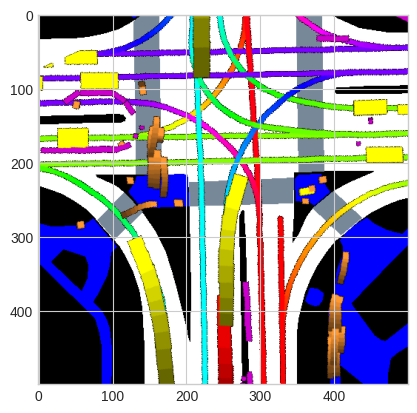

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

from nuscenes.prediction.input_representation.static_layers import StaticLayerRasterizer
from nuscenes.prediction.input_representation.agents import AgentBoxesWithFadedHistory
from nuscenes.prediction.input_representation.interface import InputRepresentation
from nuscenes.prediction.input_representation.combinators import Rasterizer

static_layer_rasterizer = StaticLayerRasterizer(helper)
agent_rasterizer = AgentBoxesWithFadedHistory(helper, seconds_of_history=6)
mtp_input_representation = InputRepresentation(static_layer_rasterizer, agent_rasterizer, Rasterizer())

instance_token_img, sample_token_img = 'bc38961ca0ac4b14ab90e547ba79fbb6', '7626dde27d604ac28a0240bdd54eba7a'
anns = [ann for ann in nusc.sample_annotation if ann['instance_token'] == instance_token_img]
img = mtp_input_representation.make_input_representation(instance_token_img, sample_token_img)

plt.imshow(img)


In [69]:
len(anns), instance_token_img, sample_token_img

(24, 'bc38961ca0ac4b14ab90e547ba79fbb6', '7626dde27d604ac28a0240bdd54eba7a')

## Model Implementations

In [48]:
from nuscenes.prediction.models.backbone import ResNetBackbone
from nuscenes.prediction.models.mtp import MTP
from nuscenes.prediction.models.covernet import CoverNet
import torch

In [70]:
backbone = ResNetBackbone('resnet50')
mtp = MTP(backbone, num_modes=2)

# Note that the value of num_modes depends on the size of the lattice used for CoverNet.
covernet = CoverNet(backbone, num_modes=64)

In [75]:
agent_state_vector = torch.Tensor([[helper.get_velocity_for_agent(instance_token_img, sample_token_img),
                                    helper.get_acceleration_for_agent(instance_token_img, sample_token_img),
                                    helper.get_heading_change_rate_for_agent(instance_token_img, sample_token_img)]])
img_tensor = torch.Tensor(img).permute(2,0,1).unsqueeze(0)

In [76]:
agent_state_vector

tensor([[5.4546, 1.9441, 0.0000]])

In [79]:
img_tensor.shape, img_tensor.dtype, img_tensor.to(torch.float64).dtype

(torch.Size([1, 3, 500, 500]), torch.float32, torch.float64)

In [80]:


# Output has 50 entries.
# The first 24 are x,y coordinates (in the agent frame) over the next 6 seconds at 2 Hz for the first mode.
# The second 24 are the x,y coordinates for the second mode.
# The last 2 are the logits of the mode probabilities
mtp(img_tensor, agent_state_vector)

tensor([[ 0.2921, -0.2405, -0.2363,  0.1879,  0.2890, -0.0369,  0.0410, -0.0804,
         -0.3601, -0.1587,  0.0490,  0.1397, -0.1752, -0.3099,  0.2498, -0.0259,
         -0.0081,  0.0675, -0.2515,  0.3279, -0.2256,  0.2331, -0.1647, -0.2377,
         -0.0732,  0.5096,  0.0225, -0.2715,  0.2911, -0.0112, -0.0874,  0.2521,
          0.0216, -0.1280, -0.0545,  0.1553,  0.0675, -0.0591, -0.0849,  0.0432,
         -0.0612, -0.1999,  0.3725,  0.0020,  0.0864,  0.2507,  0.1254, -0.0755,
          0.1861, -0.2860]], grad_fn=<CatBackward0>)

In [81]:
from nuscenes.prediction.models.physics import ConstantVelocityHeading, PhysicsOracle

cv_model = ConstantVelocityHeading(sec_from_now=6, helper=helper)
physics_oracle = PhysicsOracle(sec_from_now=6, helper=helper)

In [82]:
cv_model(f"{instance_token_img}_{sample_token_img}")

Prediction(instance=bc38961ca0ac4b14ab90e547ba79fbb6, sample=7626dde27d604ac28a0240bdd54eba7a, prediction=[[[ 388.17909232 1136.96919062]
  [ 387.06818463 1134.47838124]
  [ 385.95727695 1131.98757186]
  [ 384.84636926 1129.49676248]
  [ 383.73546158 1127.0059531 ]
  [ 382.6245539  1124.51514372]
  [ 381.51364621 1122.02433435]
  [ 380.40273853 1119.53352497]
  [ 379.29183084 1117.04271559]
  [ 378.18092316 1114.55190621]
  [ 377.07001548 1112.06109683]
  [ 375.95910779 1109.57028745]]], probabilities=[1])

In [83]:
physics_oracle(f"{instance_token_img}_{sample_token_img}")

Prediction(instance=bc38961ca0ac4b14ab90e547ba79fbb6, sample=7626dde27d604ac28a0240bdd54eba7a, prediction=[[[ 388.17909232 1136.96919062]
  [ 387.06818463 1134.47838124]
  [ 385.95727695 1131.98757186]
  [ 384.84636926 1129.49676248]
  [ 383.73546158 1127.0059531 ]
  [ 382.6245539  1124.51514372]
  [ 381.51364621 1122.02433435]
  [ 380.40273853 1119.53352497]
  [ 379.29183084 1117.04271559]
  [ 378.18092316 1114.55190621]
  [ 377.07001548 1112.06109683]
  [ 375.95910779 1109.57028745]]], probabilities=[1])